# A sample example to tune xgboost classifier showing a complex search space definition

In [1]:
from mango.tuner import Tuner

In [2]:
from scipy.stats import uniform

param_dict = {"learning_rate": uniform(0.01, 0.5),
              "gamma": uniform(0.5, 0.5),
              "max_depth": range(1,14),
              "n_estimators": range(500,2000),
              "subsample": uniform(0.7, 0.3),
              "colsample_bytree":uniform(0.3, 0.7),
              "colsample_bylevel":uniform(0.3, 0.7),
              "min_child_weight": range(1,10),
             "objective":['reg:squarederror']}


# userObjective

In [3]:
from classifiers.xgboosttree import Xgboosttree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import numpy as np

model = Xgboosttree()

import os
data_path = os.path.abspath('.')+'/classifiers/data/'

X_train, y_train =model.load_train_dataset(data_path+"PJME/train_data")
X_test, y_test = model.load_train_dataset(data_path+"PJME/test_data")
X_validate, y_validate = model.load_train_dataset(data_path+"PJME/validate_data")




count_called = 1

def objective_Xgboost(args_list):
    global X_train, y_train, model, count_called
    
    print('count_called:',count_called)
    
    count_called = count_called + 1
    results = []
    for hyper_par in args_list:
        clf = Xgboosttree(**hyper_par)
        clf.fit(X_train, y_train.ravel())
        y_pred = clf.predict(X_validate) 
        mse = mean_squared_error(y_validate, y_pred)
        mse = mse/10e5
        result =  (-1.0) * mse
        results.append(result)
        
    return results

In [4]:
conf_Dict = dict()
conf_Dict['initial_random']=10
conf_Dict['batch_size'] = 5
conf_Dict['num_iteration'] = 40
conf_Dict['domain_size'] = 10000

# Defining Tuner

In [5]:
tuner_user = Tuner(param_dict, objective_Xgboost,conf_Dict)

In [6]:
tuner_user.getConf()

{'param_dict': {'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1b864f28>,
  'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1b873438>,
  'max_depth': range(1, 14),
  'n_estimators': range(500, 2000),
  'subsample': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1b8735c0>,
  'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1b873748>,
  'colsample_bylevel': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1b8738d0>,
  'min_child_weight': range(1, 10),
  'objective': ['reg:squarederror']},
 'userObjective': <function __main__.objective_Xgboost(args_list)>,
 'domain_size': 10000,
 'initial_random': 10,
 'num_iteration': 40,
 'objective': 'maximize',
 'batch_size': 5}

In [7]:
import time
start_time = time.clock()

results = tuner_user.maximize()

end_time = time.clock()


print(end_time - start_time)

count_called: 1
count_called: 2
count_called: 3
count_called: 4
count_called: 5
count_called: 6
count_called: 7
count_called: 8
count_called: 9
count_called: 10
count_called: 11
count_called: 12
count_called: 13
count_called: 14
count_called: 15
count_called: 16
count_called: 17
count_called: 18
count_called: 19
count_called: 20
count_called: 21
count_called: 22
count_called: 23
count_called: 24
count_called: 25
count_called: 26
count_called: 27
count_called: 28
count_called: 29
count_called: 30
count_called: 31
count_called: 32
count_called: 33
count_called: 34
count_called: 35
count_called: 36
count_called: 37
count_called: 38
count_called: 39
count_called: 40
count_called: 41
632.87022


# Inspect the results

In [25]:
print('best hyper parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best hyper parameters: {'colsample_bylevel': 0.8361749637402802, 'colsample_bytree': 0.7657058079896618, 'gamma': 0.7696365655789197, 'learning_rate': 0.32551380137366537, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 651, 'objective': 'reg:squarederror', 'subsample': 0.9051231846391357}
best objective: -9.916705393679495


In [26]:
print('Sample hyper parameters tried:',len(results['params_tried']))
print(results['params_tried'][:2])

Sample hyper parameters tried: 105
[{'colsample_bylevel': 0.7376670499679088, 'colsample_bytree': 0.8990614016047136, 'gamma': 0.9636854302368618, 'learning_rate': 0.15925937655907246, 'max_depth': 2, 'min_child_weight': 9, 'n_estimators': 1008, 'objective': 'reg:squarederror', 'subsample': 0.7079474763400344}, {'colsample_bylevel': 0.42743171914167644, 'colsample_bytree': 0.9527893043197309, 'gamma': 0.8687511132765177, 'learning_rate': 0.08357664339582015, 'max_depth': 7, 'min_child_weight': 8, 'n_estimators': 654, 'objective': 'reg:squarederror', 'subsample': 0.8209873243777273}]


In [27]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 105
[-11.86441575071638, -14.213330998999558, -10.04659460929951, -18.894661610225608, -17.590119649860316]


# Plotting the actual variation in objective values of the tried results

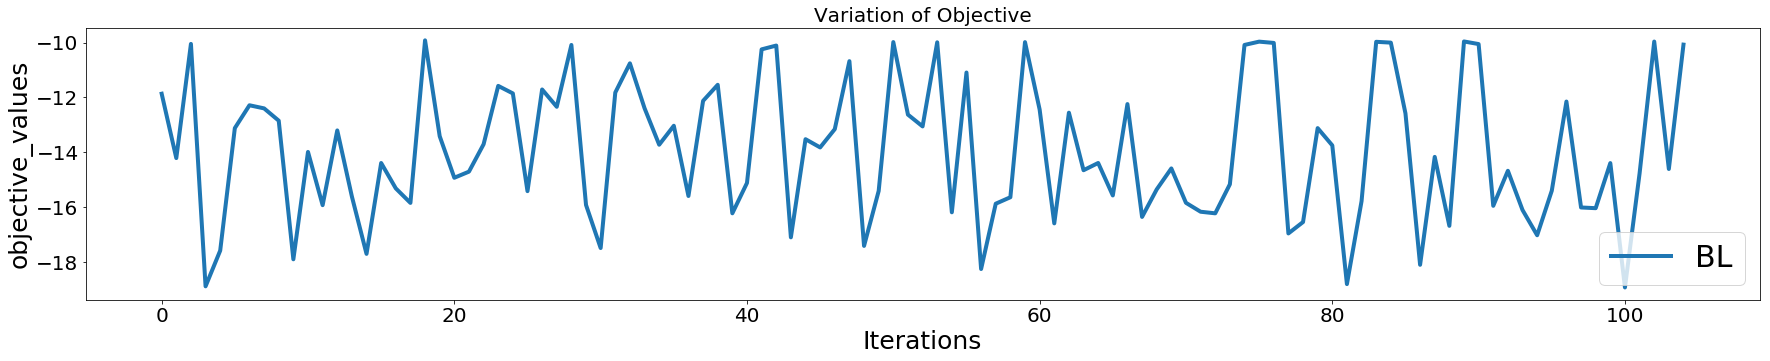

In [28]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

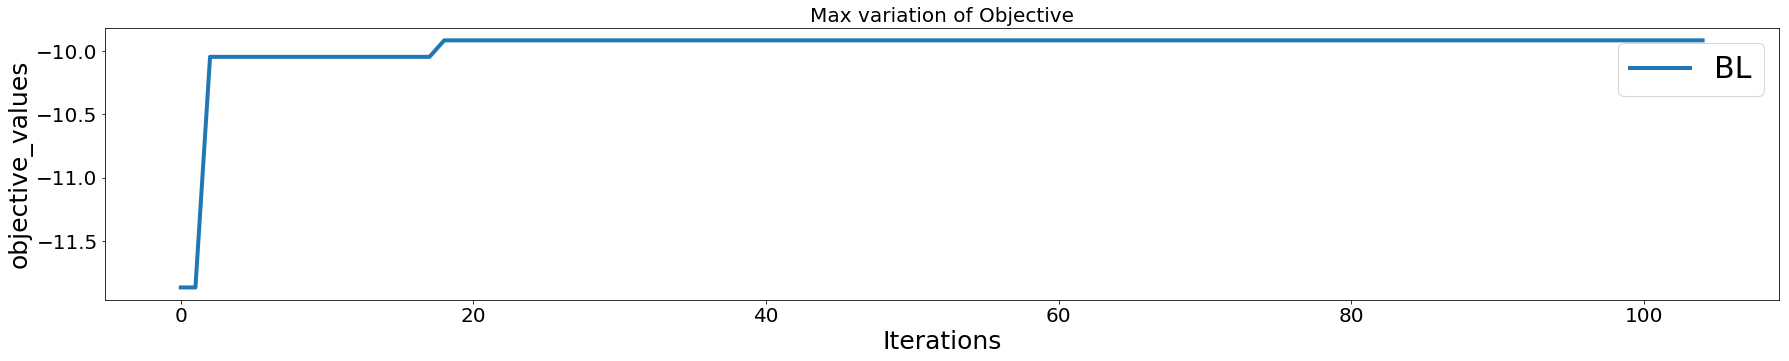

In [29]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [30]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': -9.916705393679495,
    'best_params': {   'colsample_bylevel': 0.8361749637402802,
                       'colsample_bytree': 0.7657058079896618,
                       'gamma': 0.7696365655789197,
                       'learning_rate': 0.32551380137366537,
                       'max_depth': 1,
                       'min_child_weight': 1,
                       'n_estimators': 651,
                       'objective': 'reg:squarederror',
                       'subsample': 0.9051231846391357},
    'objective_values': [   -11.86441575071638,
                            -14.213330998999558,
                            -10.04659460929951,
                            -18.894661610225608,
                            -17.590119649860316,
                            -13.120267047176469,
                            -12.2857420967365,
                            -12.399621563899176,
                            -12.84839534999506,
                            -17.90737002

# See the learned classifier result on the test data

In [31]:
model = Xgboosttree(**results['best_params'])
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test) 

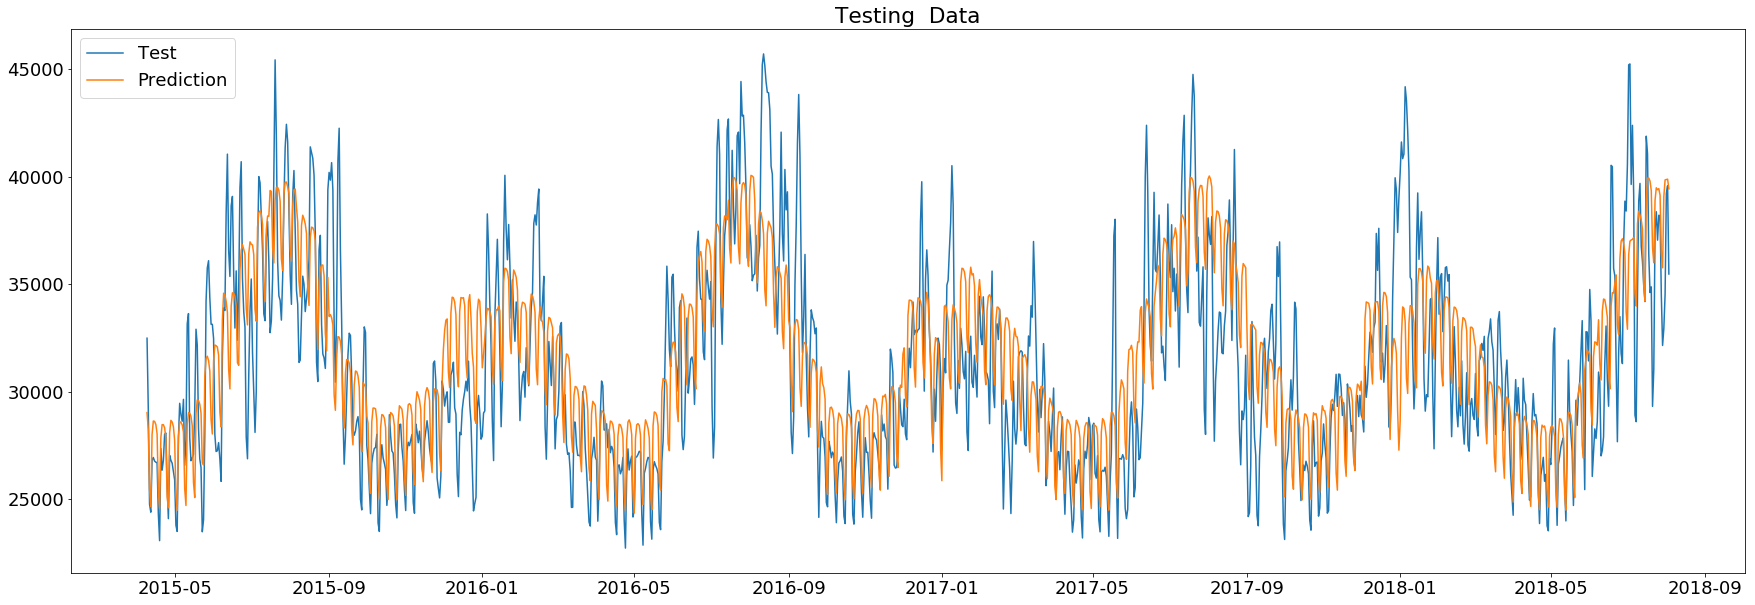

In [32]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})
plt.plot(X_test,y_test,label='Test')
plt.plot(X_test,y_pred,label='Prediction')
plt.title('Testing  Data')
plt.legend()
plt.show()

# All the Data

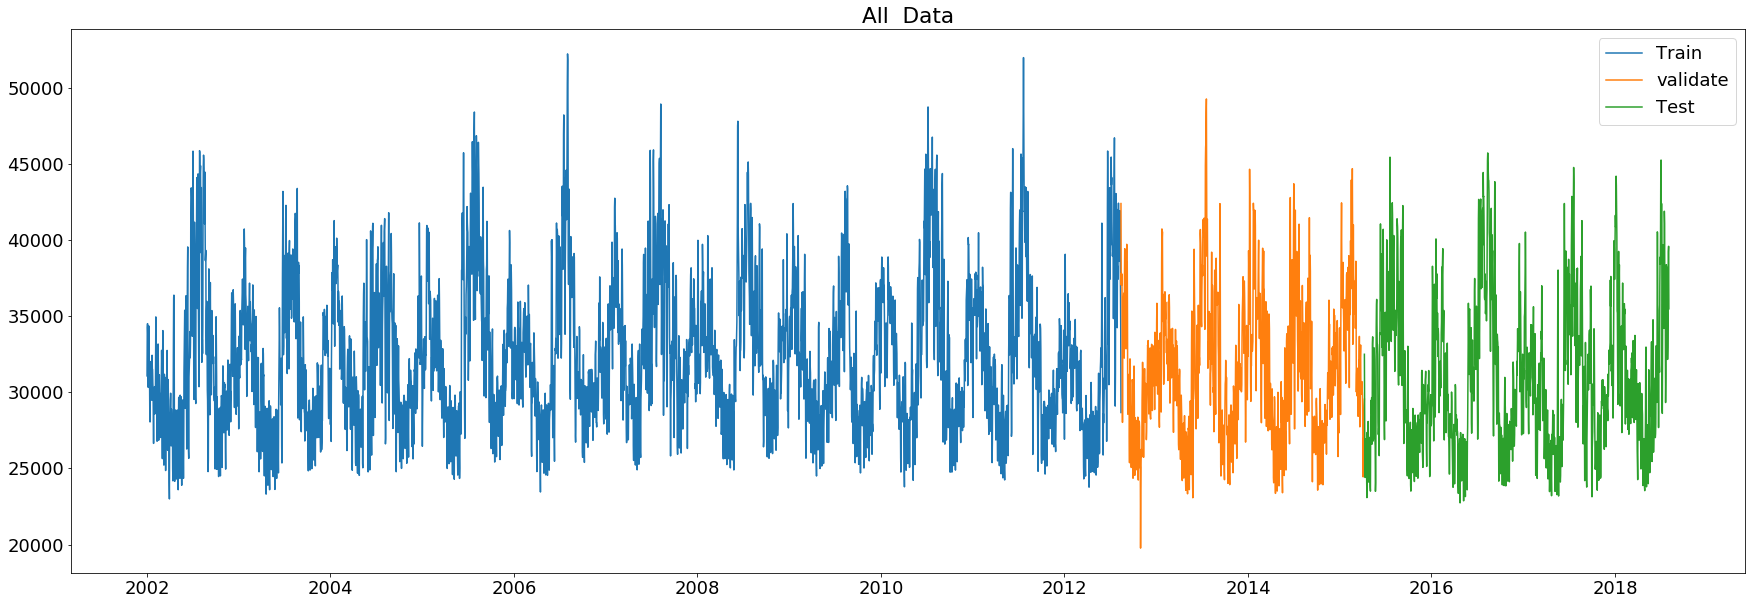

In [18]:
from classifiers.xgboosttree import Xgboosttree

model = Xgboosttree()

import os
data_path = os.path.abspath('.')+'/classifiers/data/'

X_train, y_train =model.load_train_dataset(data_path+"PJME/train_data")
X_test, y_test = model.load_train_dataset(data_path+"PJME/test_data")
X_validate, y_validate = model.load_train_dataset(data_path+"PJME/validate_data")




from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})
plt.plot(X_train,y_train,label='Train')
plt.plot(X_validate,y_validate,label='validate')
plt.plot(X_test,y_test,label='Test')
plt.title('All  Data')
plt.legend()
plt.show()
